In [1]:
from Bio import SeqIO

from collections import Counter, defaultdict
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import time

sns.set(style='whitegrid', font='serif')


## 1. (4*) Спектры k-меров


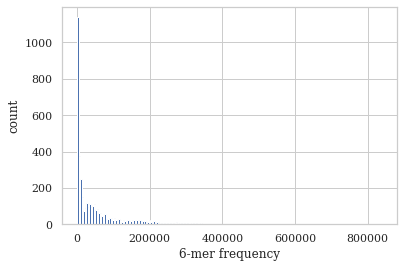

Elapsed: 900.0095748901367 seconds


In [2]:
file = 'data/1/frag.R1.fastq'
reads = SeqIO.parse(file, 'fastq')
read_quality_threshold = 20
base_quality_threshold = 22
start_time = time.time()
k = 6

def check_quality_with_threshold(qs, threshold):
    return any(q < threshold for q in qs)

def check_for_N_existence(seq):
    return any(c == 'N' for c in seq)

k_mer_counter = Counter()

for read_i, read in enumerate(reads):
    qualities = read.letter_annotations["phred_quality"]
    seq = read.seq._data
    if check_quality_with_threshold(qualities, read_quality_threshold): continue
    
    for i in range(len(seq) - k):
        k_mer = seq[i:i+k]
        k_mer_quality = qualities[i:i+k]
        
        if check_quality_with_threshold(k_mer_quality, base_quality_threshold): continue
        if check_for_N_existence(k_mer): continue
        
        k_mer_counter[k_mer] += 1

plt.hist(k_mer_counter.values(), bins=200)
plt.xlabel(f'{k}-mer frequency')
plt.ylabel('count')
plt.show()
print('Elapsed:', time.time() - start_time, 'seconds')


## 2. Распределение качества



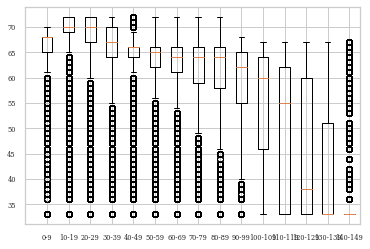

In [3]:
quality_at_dist_distribution = defaultdict(list)
reads = SeqIO.parse(file, 'fastq')
for read in reads:
    qualities = read.letter_annotations["phred_quality"]
    [quality_at_dist_distribution[i // 10].append(q) for i, q in enumerate(qualities)]

ln = len(quality_at_dist_distribution.values())

sns.set(style='whitegrid', font='serif', font_scale=0.6)
plt.boxplot(quality_at_dist_distribution.values())
plt.xticks(range(ln + 1), [''] + [f'{i * 10}-{i * 10 + 9}' for i in range(ln)])
plt.show()


### 3. Проверка результатов с помощью fastqc

In [2]:
!fastqc -k 6 data/1/frag.R1.fastq


Started analysis of frag.R1.fastq
Approx 5% complete for frag.R1.fastq
Approx 10% complete for frag.R1.fastq
Approx 15% complete for frag.R1.fastq
Approx 20% complete for frag.R1.fastq
Approx 25% complete for frag.R1.fastq
Approx 30% complete for frag.R1.fastq
Approx 35% complete for frag.R1.fastq
Approx 40% complete for frag.R1.fastq
Approx 45% complete for frag.R1.fastq
Approx 50% complete for frag.R1.fastq
Approx 55% complete for frag.R1.fastq
Approx 60% complete for frag.R1.fastq
Approx 65% complete for frag.R1.fastq
Approx 70% complete for frag.R1.fastq
Approx 75% complete for frag.R1.fastq
Approx 80% complete for frag.R1.fastq
Approx 85% complete for frag.R1.fastq
Approx 90% complete for frag.R1.fastq
Approx 95% complete for frag.R1.fastq
Analysis complete for frag.R1.fastq


<img src="data/1/fastqc-qualities.png">

Результаты для распределения ошибок получились очень похожими. (С поправкой на константу из разницы форматов phread33 и phread64 и немного других координат).